Import the necessary libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # warnings will be ignored.

### Reading csv file from local system and storing into a dataframe

In [3]:
#Reading the data set
dfloan= pd.read_csv('E:\mydata\Case Study 1\loan.csv')
dfloan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Describing the dataset
dfloan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
#Finding number of rows and columns
dfloan.shape

(39717, 111)

## Caution! Cleaning dataset begins here!

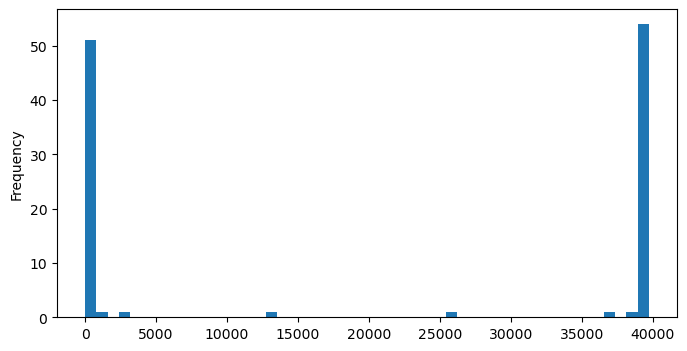

In [6]:
#visualizing distribution of null values in each column of the DataFrame dfloan using a histogram.
#null= variable storing the number of null values in each column
null = dfloan.isnull().sum()
null.plot(kind='hist', bins=50, figsize = (8,4))
plt.show()

In [7]:
#FInding out columns having null values more than 10000.
null.loc[(null.values > 10000) & (null.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [8]:
#Dropping columns having more than 10000 null values
dfloan.drop(columns=list(null[null.values > 10000].index), inplace=True)
dfloan.shape

(39717, 53)

In [9]:
#Checking column with single unique values
unique_column = dfloan.nunique()
print(unique_column)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [10]:
#Find columns with single values
cSingle=unique_column[unique_column.values==1]
cSingle

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [11]:
#Drop columns with single values
dfloan.drop(columns=list(cSingle.index),inplace=True)
dfloan.shape

(39717, 44)

In [50]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Certain columns have post loan values which are not inline with our analysis objective of finding applications which are risky before approving, so removing them would give us a clearer dataset. Also we can drop id and member id like columns since they are different for each appication.


In [12]:
#Dropping columns which are needed for this analysis.
cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
dfloan.drop(columns=cols, inplace=True)
dfloan.shape

(39717, 28)

In [13]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

## Data Preparation

In [14]:
dfloan.columns.values.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

### Exploring columns

In [15]:
dfloan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [16]:
# We do not need loans with status as 'current'for figuring out drivers of accepting or rejecting loans
dfloan=dfloan[dfloan['loan_status']!="Current"]
dfloan['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [17]:
dfloan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [18]:
dfloan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [19]:
#Remove'%' sign by splitting at % and using pd.tonumeric to convert the part to numeric
dfloan['int_rate']=dfloan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
dfloan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [18]:
dfloan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

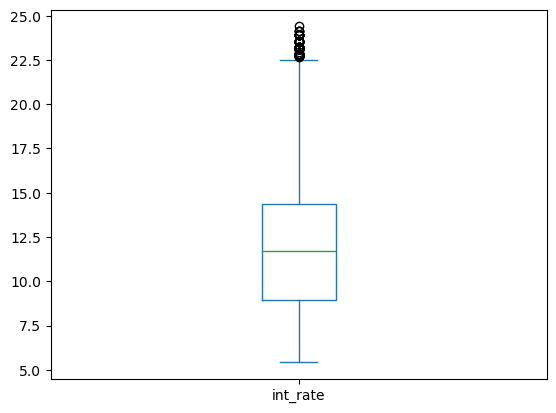

In [20]:
#Plotting the values in a box plot to check if it has outliers
dfloan['int_rate'].plot.box()

We can see there are some outliers which will need to be handled.

In [21]:
dfloan.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [22]:
dfloan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [23]:
dfloan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [24]:
print(dfloan['emp_title'].value_counts().head())
#print(dfloan['emp_title'].unique().shape)

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64


In [25]:
print(dfloan['emp_length'].unique())
print(dfloan['emp_length'].nunique())


['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]
11


In [26]:
print(dfloan['emp_length'].isnull().sum())

1033


In [27]:
dfloan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [28]:
dfloan['loan_amnt'].head()

0     5000
1     2500
2     2400
3    10000
5     5000
Name: loan_amnt, dtype: int64

In [29]:
dfloan['loan_amnt'].isnull().sum()

0

In [30]:
dfloan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [31]:
dfloan['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [32]:
dfloan['annual_inc'].isnull().sum()

0

In [33]:
dfloan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [34]:
# Split the date into Month and Year and store them in derived columns issue_y and issue_m.
month, year=dfloan['issue_d'].str.split('-').str
month.value_counts()
dfloan['issue_m']=month
dfloan['issue_y']=pd.to_numeric(year)
#dfloan['issue_y'].dtype

In [35]:
dfloan['issue_m'].value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_m, dtype: int64

In [36]:
dfloan['issue_y'].value_counts()

11    20516
10    11532
9      4716
8      1562
7       251
Name: issue_y, dtype: int64

In [37]:
#dropping column as we extracted the month and year
dfloan.drop(columns=['issue_d'],inplace=True)

In [38]:
dfloan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [39]:
#credit line opening date
dfloan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [40]:
 dfloan['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [41]:
#separate Year and Month
month, year=dfloan['earliest_cr_line'].str.split('-').str
month.value_counts()

Oct    3967
Dec    3951
Nov    3811
Sep    3505
Jan    3331
Aug    3213
Jul    2967
Jun    2863
May    2825
Feb    2783
Mar    2715
Apr    2646
Name: earliest_cr_line, dtype: int64

In [42]:
dfloan['month_earliest_cr']=month
dfloan['year_earliest_cr']=pd.to_numeric(year)
#dropping column as we extracted the month and year
dfloan.drop(columns=['earliest_cr_line'],inplace=True)

In [43]:
dfloan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [44]:
#let us convert these values in numberics by removing %
dfloan['revol_util'] = pd.Series(dfloan['revol_util']).str.replace('%', '').astype(float)
dfloan['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [45]:
dfloan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [46]:
#calculate percentage of each value for 'loan_status'
percentloan = dfloan['loan_status'].value_counts(normalize=True)
percentloan.round(2)

Fully Paid     0.85
Charged Off    0.15
Name: loan_status, dtype: float64

In [47]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

### Univariate Analysis

#### Let us check the correlation between the various numeric fields to see the relationships

In [48]:
# assigning 1 for charged off loans and 0 for  fully paid ones
dfloan['loan_st_ind'] =dfloan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
dfloan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y,month_earliest_cr,year_earliest_cr,loan_st_ind
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,13648,83.7,9,0.0,Dec,11,Jan,85,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,1687,9.4,4,0.0,Dec,11,Apr,99,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,2956,98.5,10,0.0,Dec,11,Nov,1,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,5598,21.0,37,0.0,Dec,11,Feb,96,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,7963,28.3,12,0.0,Dec,11,Nov,4,0


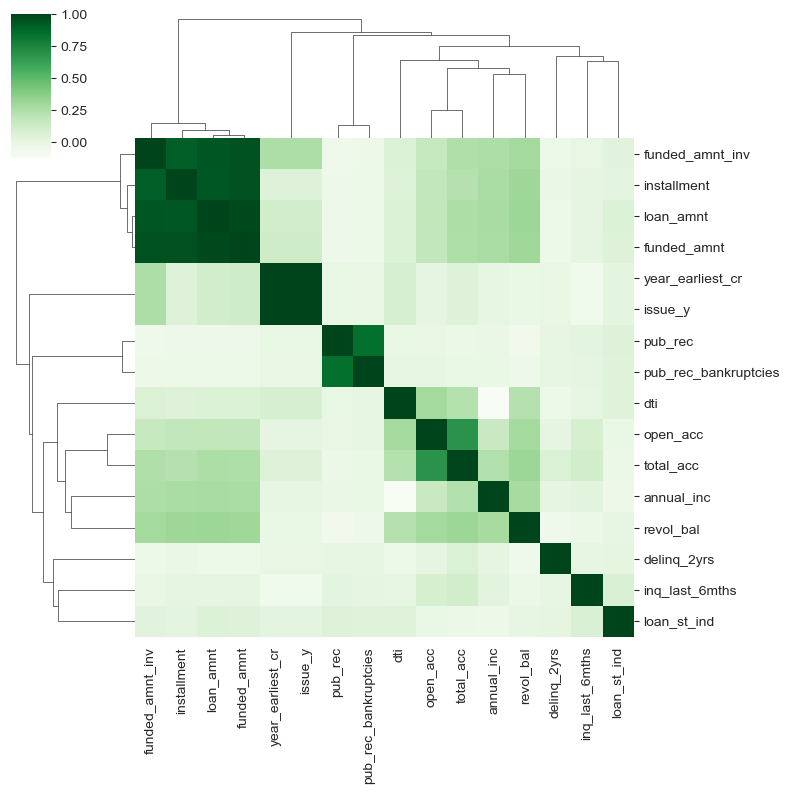

In [76]:
# Let us use the seaborn library to derive a clustermap to see teh correlation of dfloan columns
sns.set_style("whitegrid")
sns.clustermap(data=dfloan.corr(), cmap='Greens', figsize=(8,8))
plt.show()

##### From the clustermap we found out that funded_amnt_inv, installment, loan_amnt, funded_amnt have big correlation

## Comparing loan_status with other numerical conitnuous values

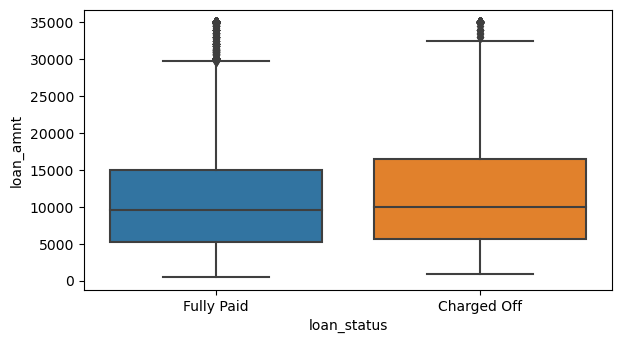

In [49]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = dfloan)
plt.show()

#### Getting rid of outliers

In [50]:
dfloan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Since there is a huge jump of values above 75% quantile, let us get rid of those outlier values.

In [51]:
#storing dataframe with values less than or equal to 15000 in loan_amnt75
loan_amnt75=dfloan.loc[(dfloan['loan_amnt']<=15000)]

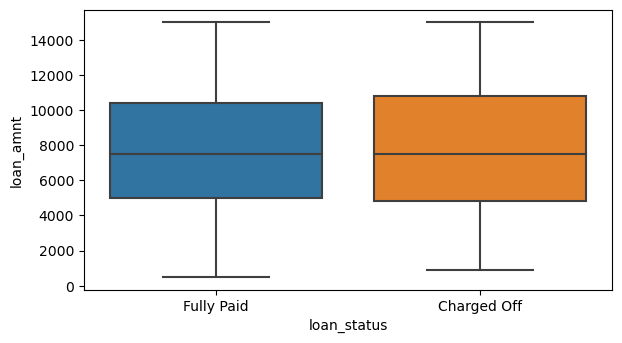

In [52]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_amnt75)
plt.show()

Max value is 35000 and min value os 500, we will create bins according to these values and compare the loan_status and loan_amnt columns

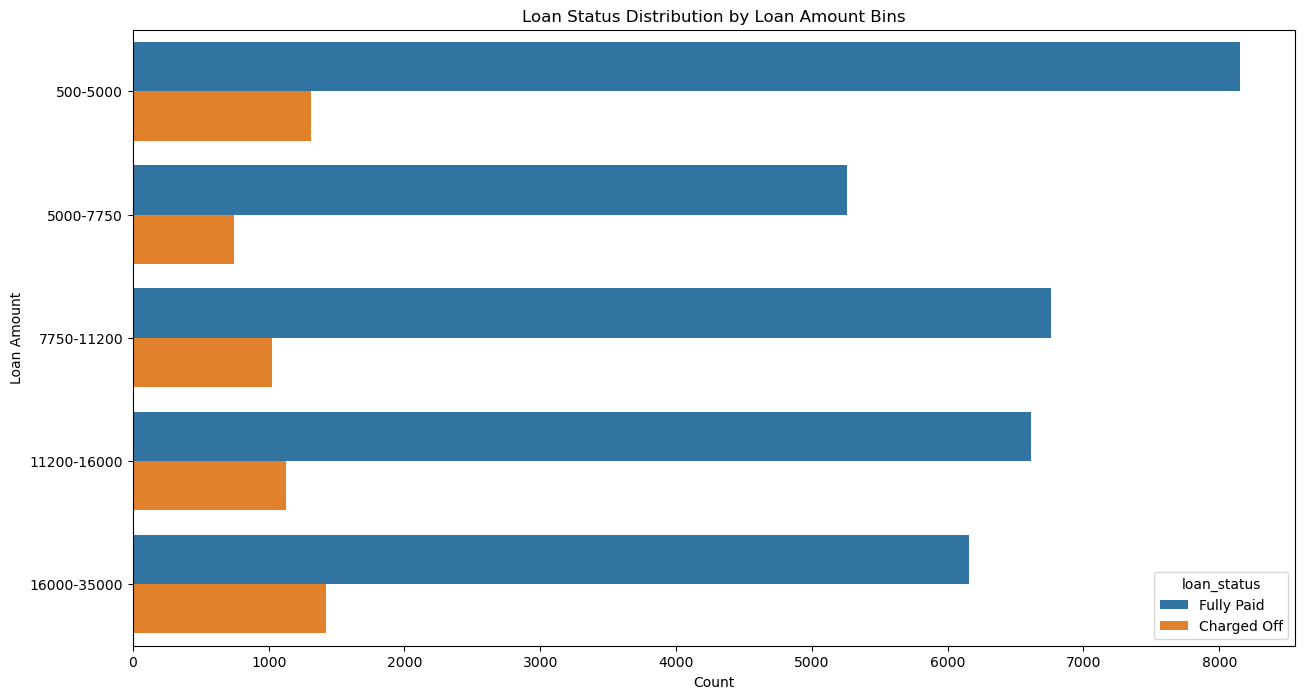

In [41]:
bins=[500,5000,7750,11200,16000,35000]

# Create a new column 'loan_amount_bin' with the bin labels
dfloan['column_bin'] = pd.cut(dfloan['loan_amnt'], bins=bins, labels=['500-5000', '5000-7750', '7750-11200', '11200-16000','16000-35000'])
plt.figure(figsize=(15, 8))
sns.countplot(y='column_bin', hue='loan_status', data=dfloan)
plt.xlabel('Count')
plt.ylabel('Loan Amount')
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

We can see higher loan amounts lead to more charge offs

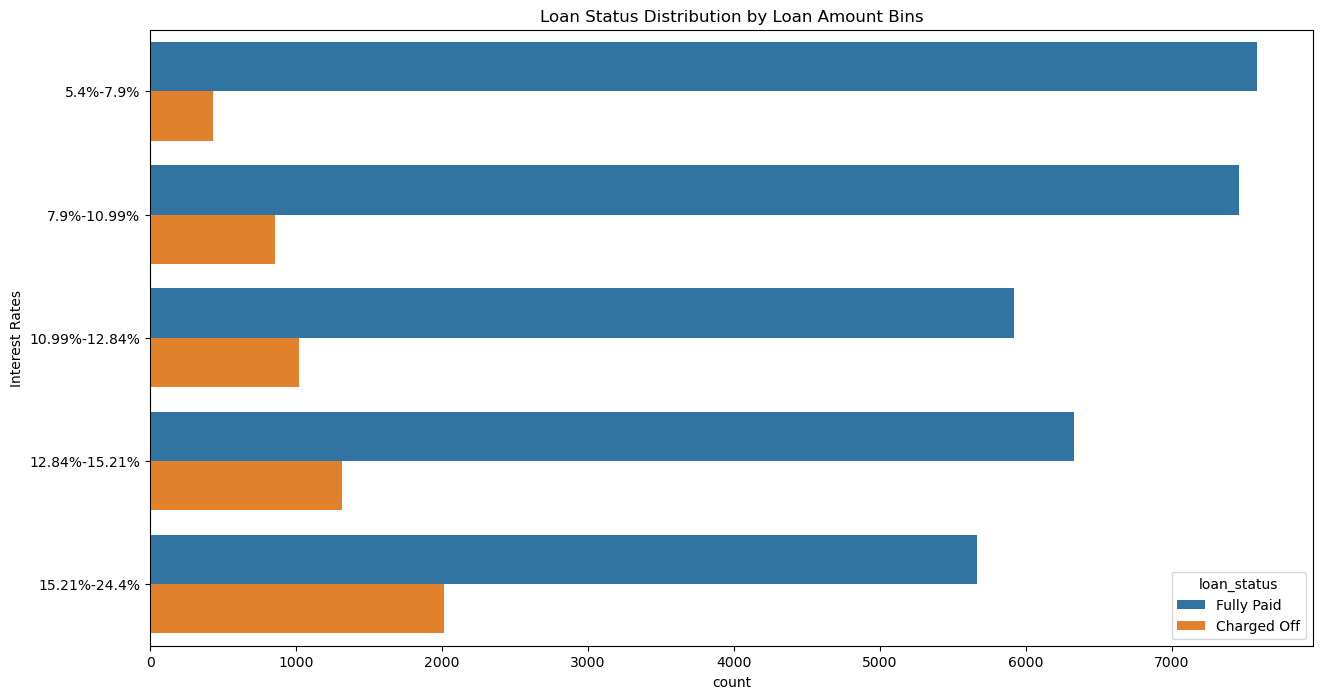

In [42]:
bins=[5.4,7.9,10.99,12.84,15.21,24.4]

dfloan['column_bin'] = pd.cut(dfloan['int_rate'], bins=bins, labels=['5.4%-7.9%', '7.9%-10.99%', '10.99%-12.84%', '12.84%-15.21%','15.21%-24.4%'])
plt.figure(figsize=(15,8))

sns.countplot(y='column_bin', hue='loan_status', data=dfloan)
plt.ylabel('Interest Rates')
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()


We can see that higher interest rates also contribute to charge offs shooting up.

In [43]:
dfloan.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

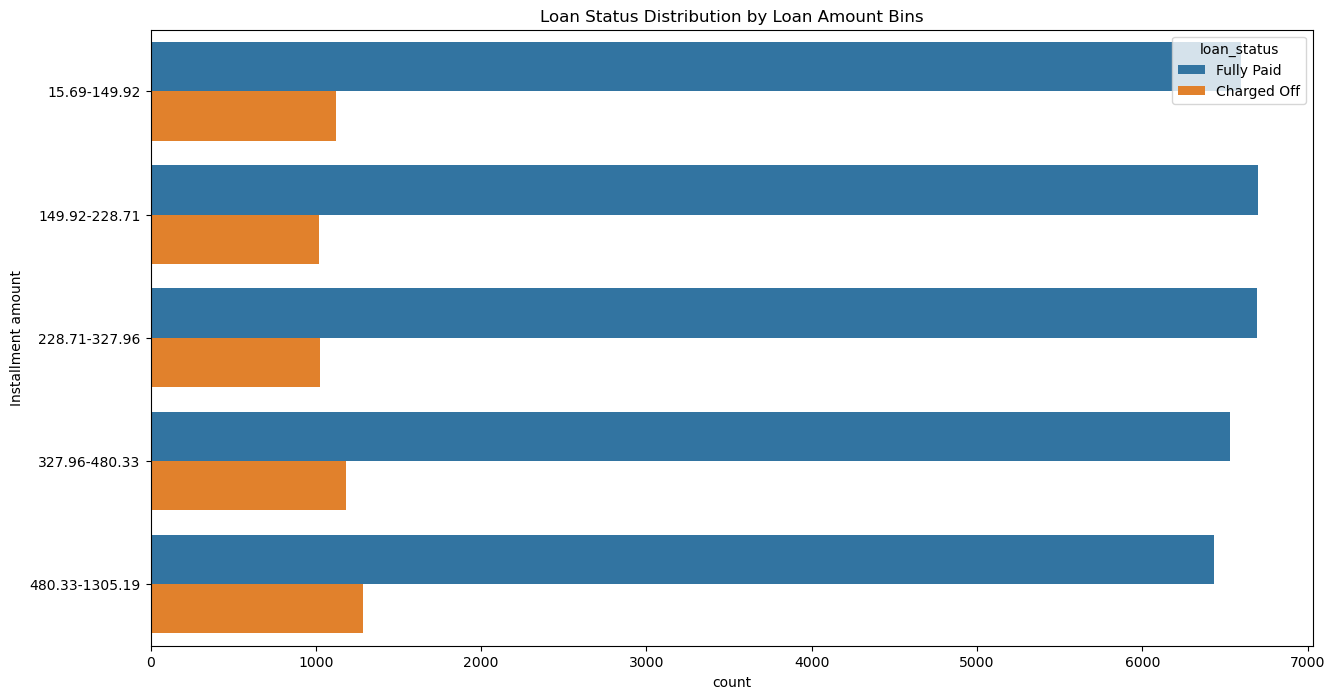

In [44]:
bins=[15.69,149.92,228.71,327.96,480.33,1305.19]

dfloan['column_bin']=pd.cut(dfloan['installment'],bins=bins,labels=['15.69-149.92', '149.92-228.71', '228.71-327.96', '327.96-480.33','480.33-1305.19'])
plt.figure(figsize=(15,8))

sns.countplot(y='column_bin', hue='loan_status', data=dfloan)
plt.ylabel('Installment amount')
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

From above plot we can see that higher interest amounts leads to higher defaults.

In [55]:
dfloan.annual_inc.head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [59]:
dfloan.annual_inc.median()

58868.0

In [57]:
dfloan.annual_inc.max()

6000000.0

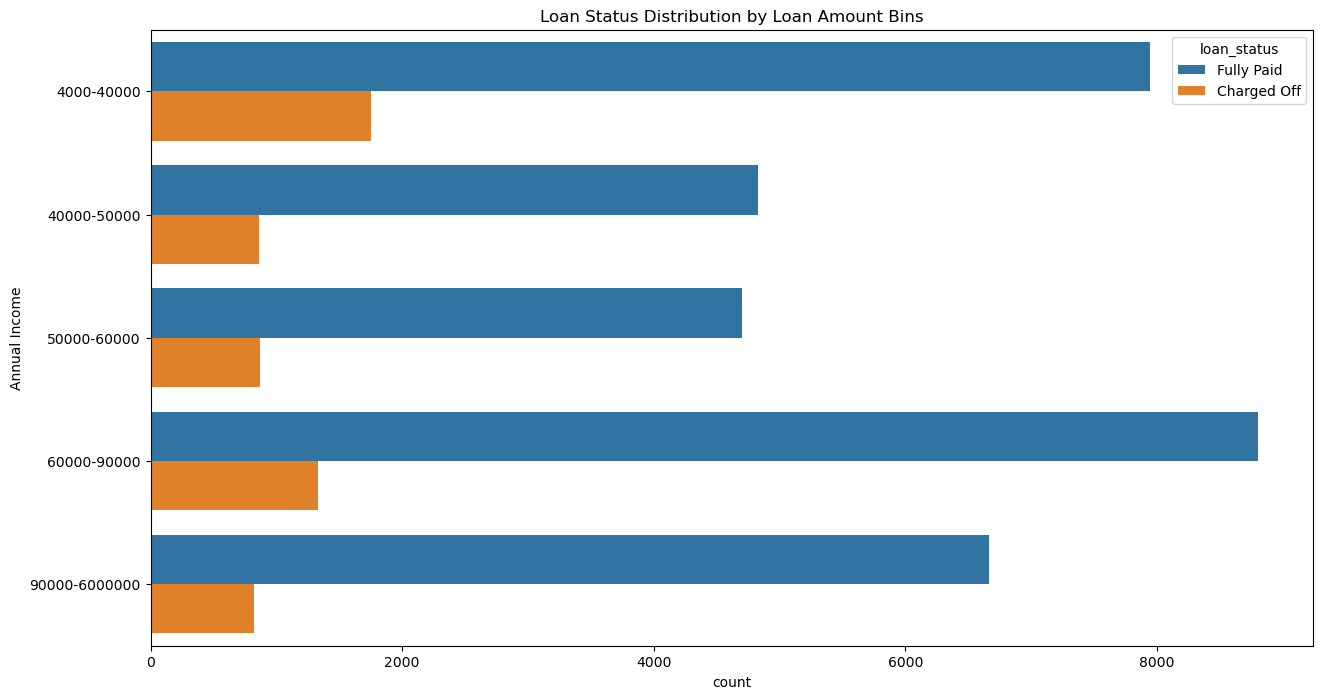

In [45]:
bins=[4000,40000,50000,60000,90000,6000000]
dfloan['column_bin']=pd.cut(dfloan['annual_inc'],bins=bins,labels=['4000-40000','40000-50000','50000-60000','60000-90000','90000-6000000'])

plt.figure(figsize=(15,8))
sns.countplot(y='column_bin',hue='loan_status',data=dfloan)
plt.ylabel('Annual Income')
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

We can see that lower income has higher default chances, higher income has least default chances

In [67]:
dfloan.dti.describe()


count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

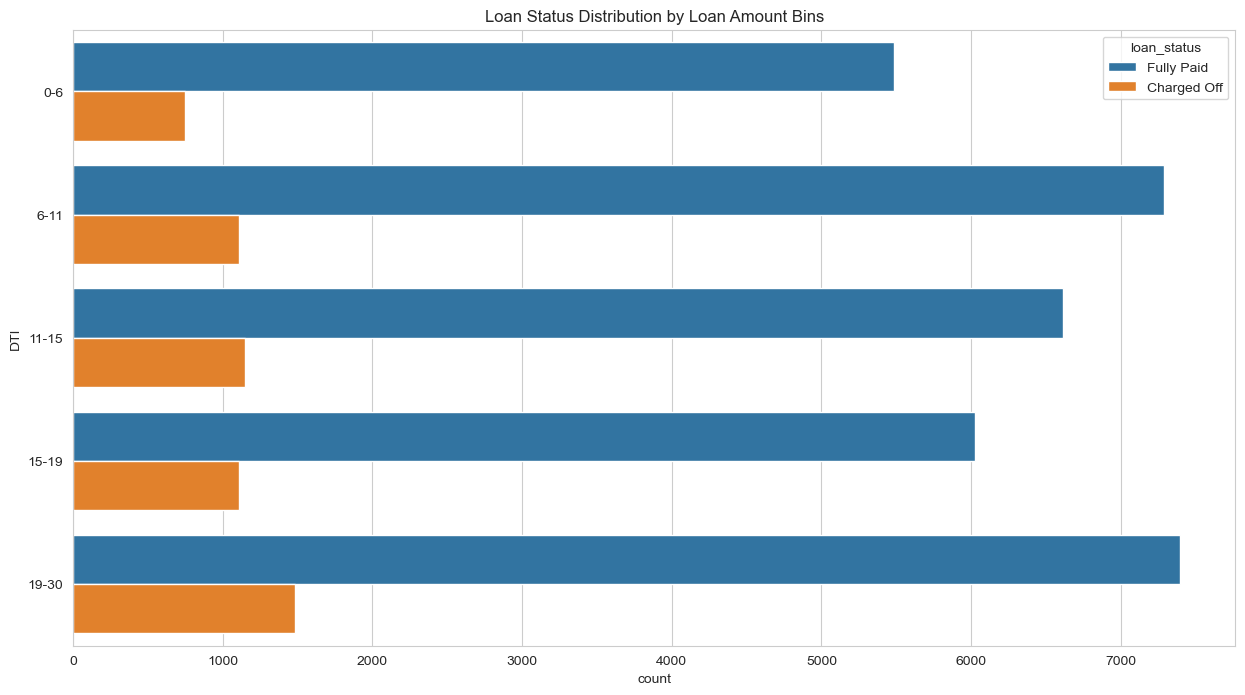

In [110]:
bins=[0,6,11,15,19,30]
dfloan['column_bin']=pd.cut(dfloan['dti'],bins=bins,labels=['0-6','6-11','11-15','15-19','19-30'])

plt.figure(figsize=(15,8))
sns.countplot(y='column_bin',hue='loan_status',data=dfloan)
plt.ylabel('DTI')
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

Higher DTI leads more defaults

In [92]:
dfloan.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

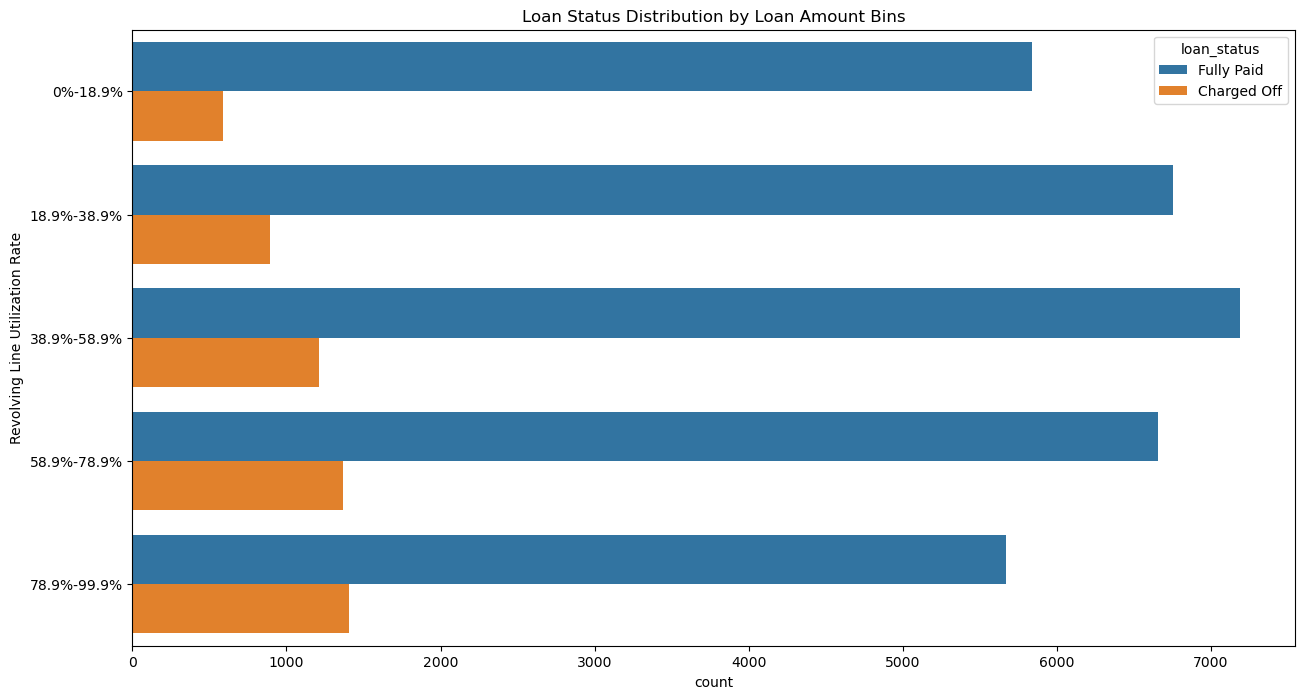

In [47]:
bins=[0,18.9,38.9,58.9,78.9,99.9]
dfloan['column_bin']=pd.cut(dfloan['revol_util'],bins=bins,labels=['0%-18.9%','18.9%-38.9%','38.9%-58.9%','58.9%-78.9%','78.9%-99.9%'])

plt.figure(figsize=(15,8))
sns.countplot(y='column_bin',hue='loan_status',data=dfloan)
plt.ylabel("Revolving Line Utilization Rate")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

Higher Revolving line utilization rate indicates higher default chances.

In [53]:
dfloan.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

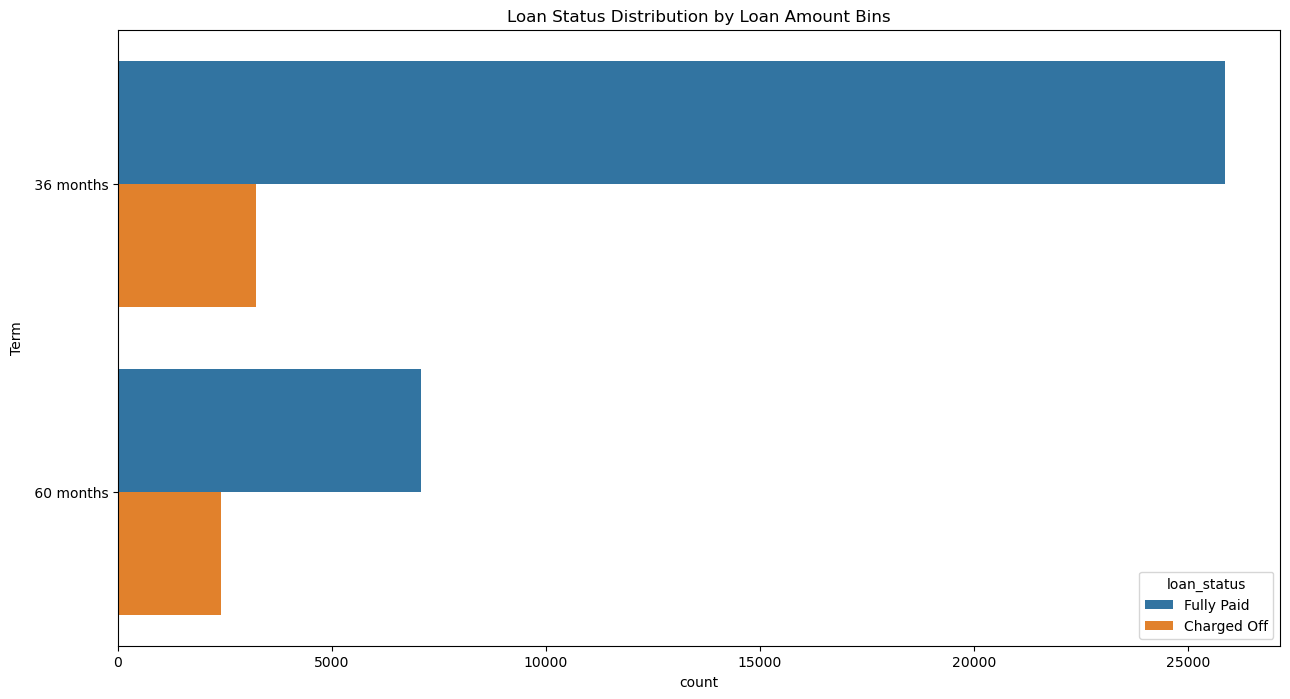

In [54]:
#bins=[0,18.9,38.9,58.9,78.9,99.9]
#dfloan['column_bin']=pd.cut(dfloan['revol_util'],bins=bins,labels=['0%-18.9%','18.9%-38.9%','38.9%-58.9%','58.9%-78.9%','78.9%-99.9%'])

plt.figure(figsize=(15,8))
sns.countplot(y='term',hue='loan_status',data=dfloan)
plt.ylabel("Term")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [48]:
dfloan['numcolumn']=pd.Series(dfloan['term'].str.replace('months','')).astype(int)
newdf=dfloan[dfloan['numcolumn']==36]
per1=newdf['loan_status'].value_counts(normalize=True).round(2)
print('For 36 months term:')
print(per1)

newdf=dfloan[dfloan['numcolumn']==60]
per1=newdf['loan_status'].value_counts(normalize=True).round(2)
print('For 60 months term:')
print(per1)

For 36 months term:
Fully Paid     0.89
Charged Off    0.11
Name: loan_status, dtype: float64
For 60 months term:
Fully Paid     0.75
Charged Off    0.25
Name: loan_status, dtype: float64


We can see that for 36 months the charge of rate is 11%, while for 60 months it is 25%. Hence there is higher chance of efaulting loans for higher loan repayment time. 

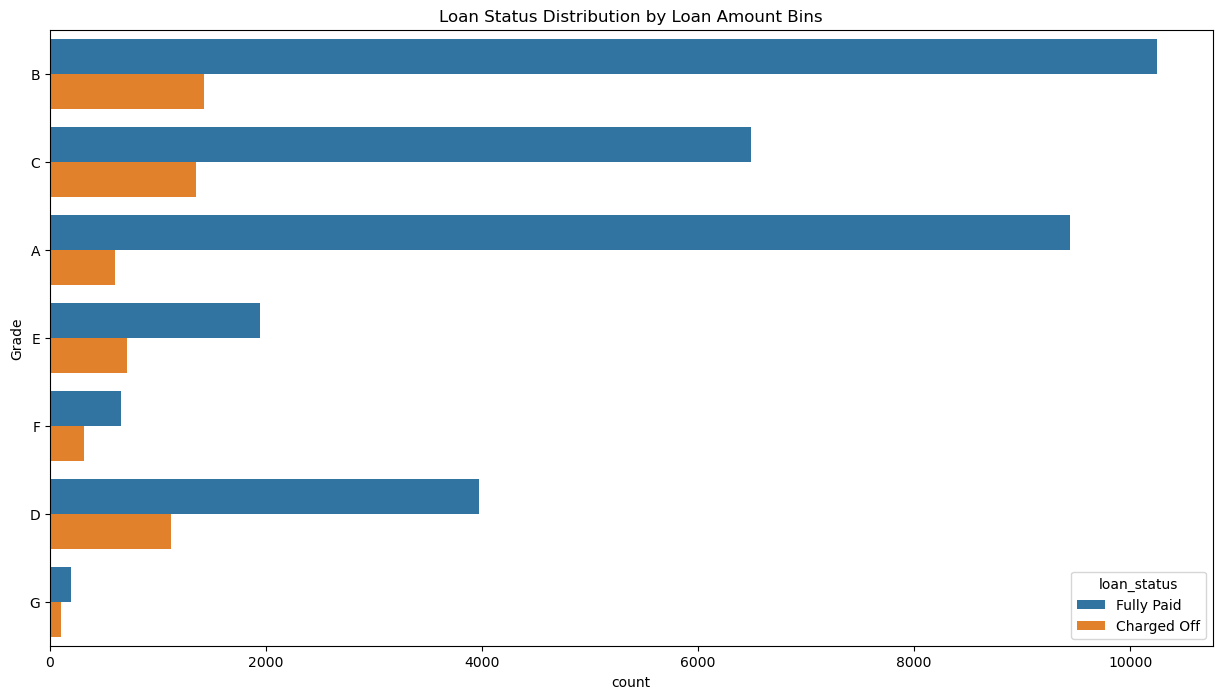

In [68]:
plt.figure(figsize=(15,8))
sns.countplot(y='grade',hue='loan_status',data=dfloan)
plt.ylabel("Grade")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [70]:
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

for grade in grades:
    newdf = dfloan[dfloan['grade'] == grade]
    per = newdf['loan_status'].value_counts(normalize=True).round(2)
    print(f"Grade: {grade}")
    print(per)
    print("\n")

Grade: A
Fully Paid     0.94
Charged Off    0.06
Name: loan_status, dtype: float64


Grade: B
Fully Paid     0.88
Charged Off    0.12
Name: loan_status, dtype: float64


Grade: C
Fully Paid     0.83
Charged Off    0.17
Name: loan_status, dtype: float64


Grade: D
Fully Paid     0.78
Charged Off    0.22
Name: loan_status, dtype: float64


Grade: E
Fully Paid     0.73
Charged Off    0.27
Name: loan_status, dtype: float64


Grade: F
Fully Paid     0.67
Charged Off    0.33
Name: loan_status, dtype: float64


Grade: G
Fully Paid     0.66
Charged Off    0.34
Name: loan_status, dtype: float64




We can see that for lower grades the charge off percent shoots up

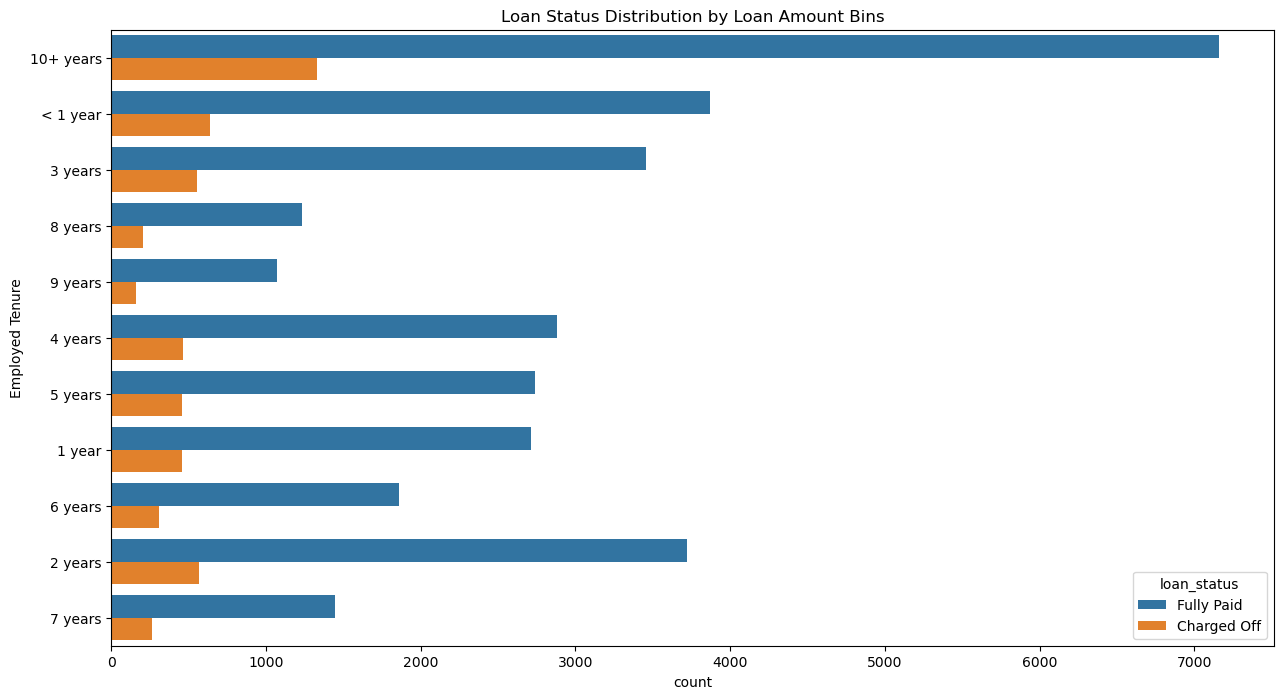

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(y='emp_length',hue='loan_status',data=dfloan)
plt.ylabel("Employed Tenure")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [79]:
tenure = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years','8 years','9 years','10+ years']

for time in tenure:
    newdf = dfloan[dfloan['emp_length'] == time]
    per = newdf['loan_status'].value_counts(normalize=True)
    print(f"Employee length: {time}")
    print(per)
    print("\n")

Employee length: < 1 year
Fully Paid     0.858252
Charged Off    0.141748
Name: loan_status, dtype: float64


Employee length: 1 year
Fully Paid     0.856106
Charged Off    0.143894
Name: loan_status, dtype: float64


Employee length: 2 years
Fully Paid     0.867863
Charged Off    0.132137
Name: loan_status, dtype: float64


Employee length: 3 years
Fully Paid     0.861665
Charged Off    0.138335
Name: loan_status, dtype: float64


Employee length: 4 years
Fully Paid     0.861759
Charged Off    0.138241
Name: loan_status, dtype: float64


Employee length: 5 years
Fully Paid     0.856606
Charged Off    0.143394
Name: loan_status, dtype: float64


Employee length: 6 years
Fully Paid     0.858395
Charged Off    0.141605
Name: loan_status, dtype: float64


Employee length: 7 years
Fully Paid     0.846289
Charged Off    0.153711
Name: loan_status, dtype: float64


Employee length: 8 years
Fully Paid     0.858537
Charged Off    0.141463
Name: loan_status, dtype: float64


Employee length: 9 

Though there is not much evident data, we can say that people with less than 1 year employment are likely to default more.

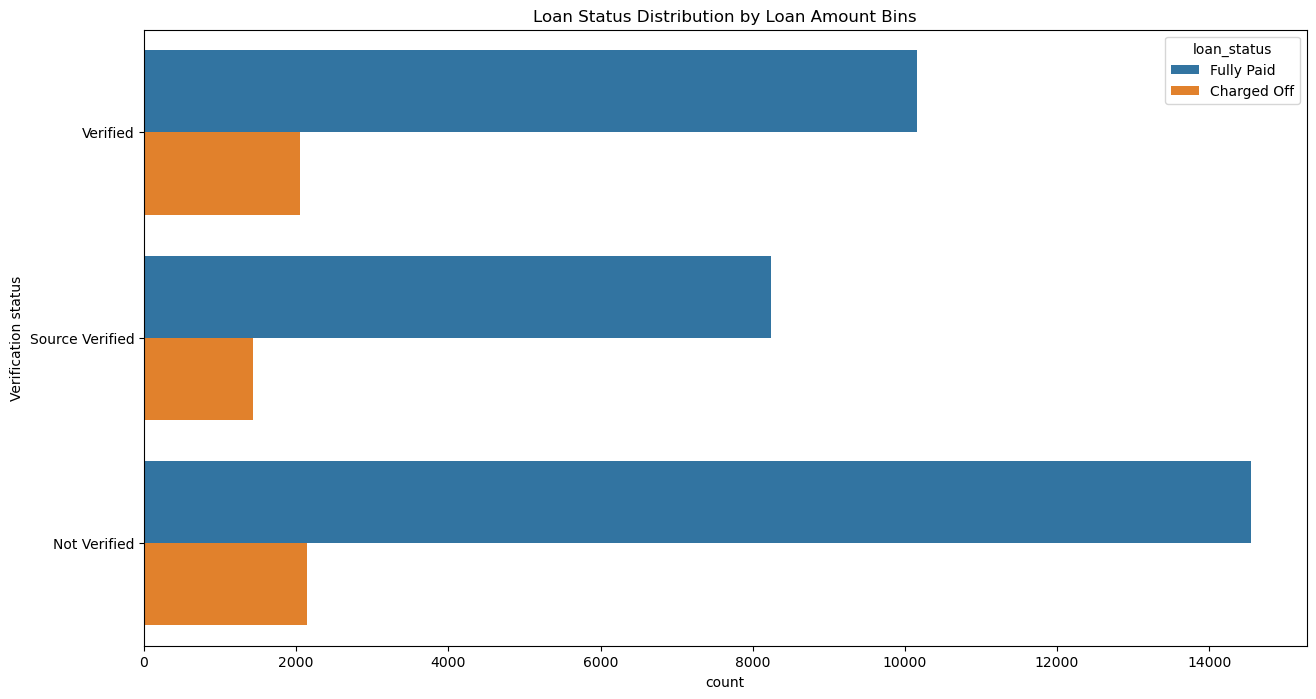

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(y='verification_status',hue='loan_status',data=dfloan)
plt.ylabel("Verification status")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [51]:
ver_status = ['Verified','Source Verified','Not Verified']

for status in ver_status:
    newdf = dfloan[dfloan['verification_status'] == status]
    per = newdf['loan_status'].value_counts(normalize=True).round(2)
    print(f"Verification Status: {status}")
    print(per)
    print("\n")

Verification Status: Verified
Fully Paid     0.83
Charged Off    0.17
Name: loan_status, dtype: float64


Verification Status: Source Verified
Fully Paid     0.85
Charged Off    0.15
Name: loan_status, dtype: float64


Verification Status: Not Verified
Fully Paid     0.87
Charged Off    0.13
Name: loan_status, dtype: float64




From the above chart and data we can say that there is something wrong with the verification process since verified applications tend to have more defaulters.

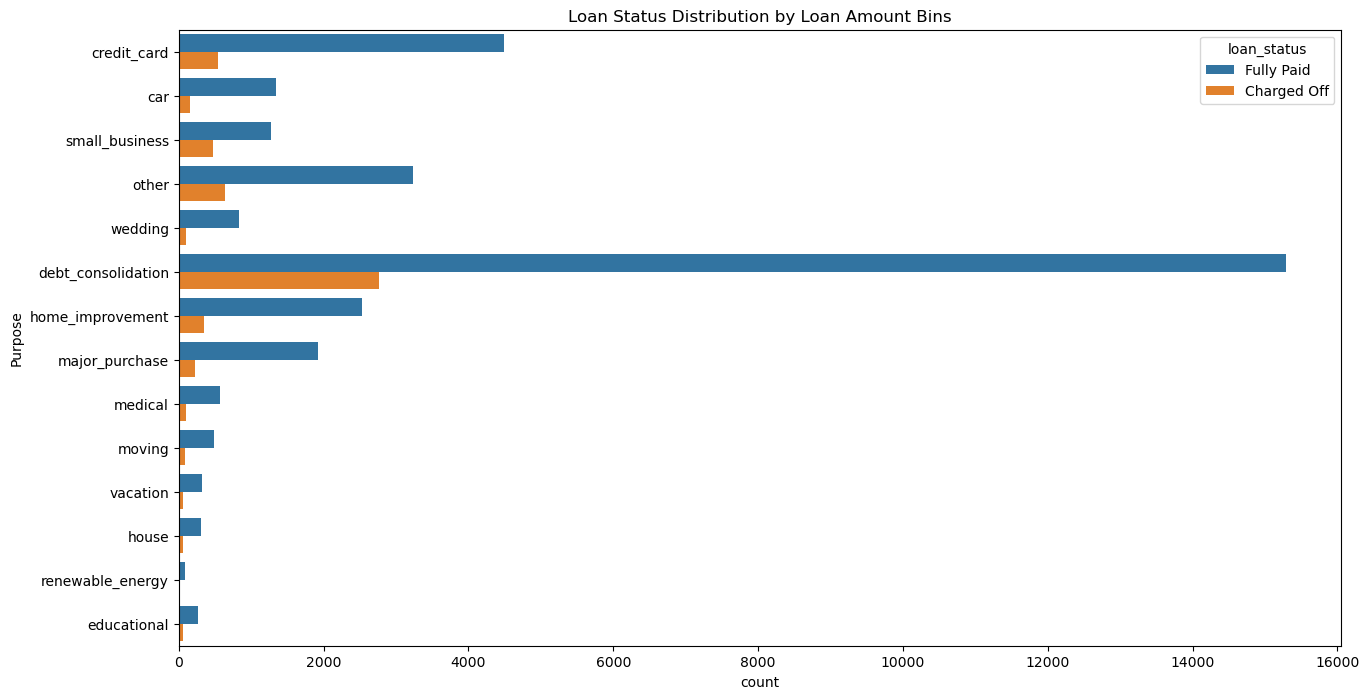

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(y='purpose',hue='loan_status',data=dfloan)
plt.ylabel("Purpose")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [53]:
purpose = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business','car','wedding','medical','moving','vacation','house','educational','renewable_energy']

for purp in purpose:
    newdf = dfloan[dfloan['purpose'] == purp]
    per = newdf['loan_status'].value_counts(normalize=True).round(2)
    print(f"Purpose: {purp}")
    print(per)
    print("\n")

Purpose: debt_consolidation
Fully Paid     0.85
Charged Off    0.15
Name: loan_status, dtype: float64


Purpose: credit_card
Fully Paid     0.89
Charged Off    0.11
Name: loan_status, dtype: float64


Purpose: other
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


Purpose: home_improvement
Fully Paid     0.88
Charged Off    0.12
Name: loan_status, dtype: float64


Purpose: major_purchase
Fully Paid     0.9
Charged Off    0.1
Name: loan_status, dtype: float64


Purpose: small_business
Fully Paid     0.73
Charged Off    0.27
Name: loan_status, dtype: float64


Purpose: car
Fully Paid     0.89
Charged Off    0.11
Name: loan_status, dtype: float64


Purpose: wedding
Fully Paid     0.9
Charged Off    0.1
Name: loan_status, dtype: float64


Purpose: medical
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


Purpose: moving
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


Purpose: vacation
Fully Paid     0.86
Charg

Apparently loans granted for small business,renewable energy, educational are riskier.

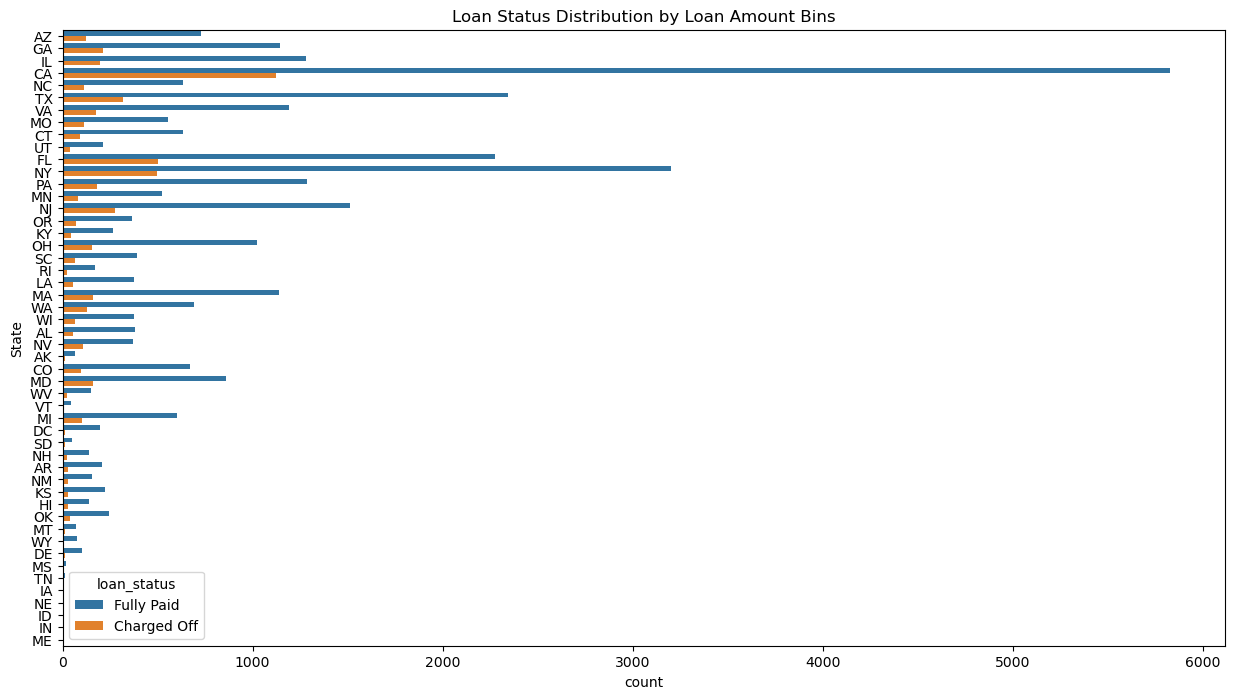

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(y='addr_state',hue='loan_status',data=dfloan)
plt.ylabel("State")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [24]:
state = ['NE','NV','SD','AK','FL','MO','HI','ID','NM','OR','CA','UT','MD','GA','NJ','WA','NC','NH','MI','AZ','KY','SC','WI','OK','MN','NY','IL','MT','OH','CT','VA','RI','CO','AL','LA','PA','MA','WV','KS','TX','TN','AR','VT','DE','MS','DC','WY']

for zone in state:
    newdf = dfloan[dfloan['addr_state'] == zone]
    per = newdf['loan_status'].value_counts(normalize=True).round(2)
    print(f"State: {zone}")
    print(per)
    print("\n")

State: NE
Charged Off    0.6
Fully Paid     0.4
Name: loan_status, dtype: float64


State: NV
Fully Paid     0.77
Charged Off    0.23
Name: loan_status, dtype: float64


State: SD
Fully Paid     0.81
Charged Off    0.19
Name: loan_status, dtype: float64


State: AK
Fully Paid     0.81
Charged Off    0.19
Name: loan_status, dtype: float64


State: FL
Fully Paid     0.82
Charged Off    0.18
Name: loan_status, dtype: float64


State: MO
Fully Paid     0.83
Charged Off    0.17
Name: loan_status, dtype: float64


State: HI
Fully Paid     0.83
Charged Off    0.17
Name: loan_status, dtype: float64


State: ID
Fully Paid     0.83
Charged Off    0.17
Name: loan_status, dtype: float64


State: NM
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


State: OR
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


State: CA
Fully Paid     0.84
Charged Off    0.16
Name: loan_status, dtype: float64


State: UT
Fully Paid     0.84
Charged Off    0.16
Name: 

We can find out certain states are riskier.

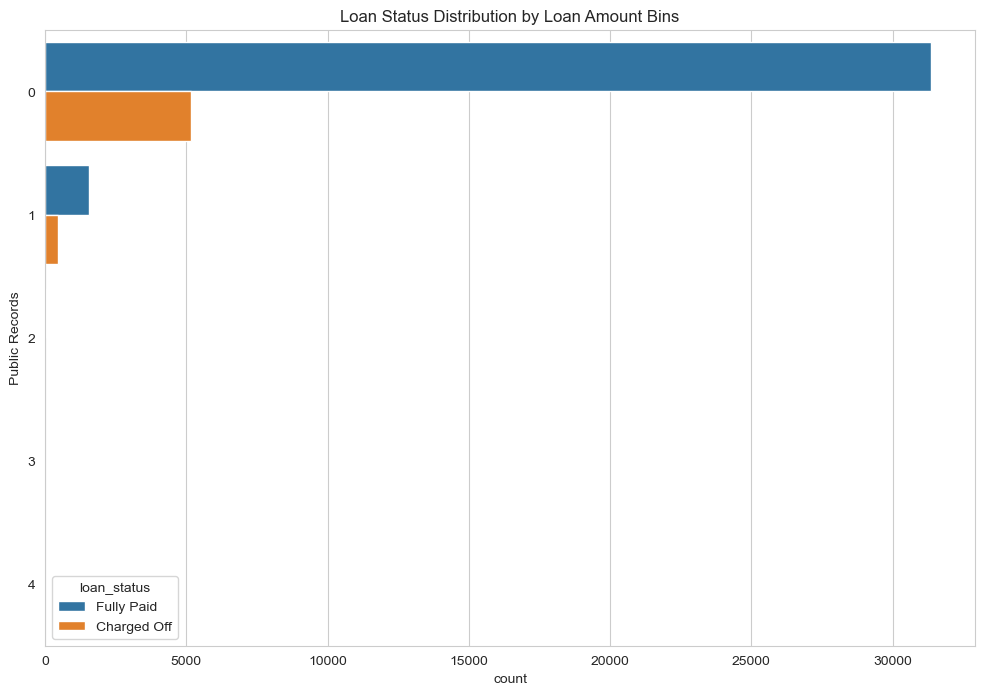

In [111]:
plt.figure(figsize=(12,8))
sns.countplot(y='pub_rec',hue='loan_status',data=dfloan)
plt.ylabel("Public Records")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [15]:
public_rec = [0,1,2,3,4]

for rec in public_rec:
    newdf = dfloan[dfloan['pub_rec'] == rec]
    per = newdf['loan_status'].value_counts(normalize=True).round(2)
    print(f"Public Records: {rec}")
    print(per)
    print("\n")

Public Records: 0
Fully Paid     0.86
Charged Off    0.14
Name: loan_status, dtype: float64


Public Records: 1
Fully Paid     0.77
Charged Off    0.23
Name: loan_status, dtype: float64


Public Records: 2
Fully Paid     0.79
Charged Off    0.21
Name: loan_status, dtype: float64


Public Records: 3
Fully Paid    1.0
Name: loan_status, dtype: float64


Public Records: 4
Fully Paid    1.0
Name: loan_status, dtype: float64




We can see that the applicants with non zero dereogatory record have higher chance of charge off.

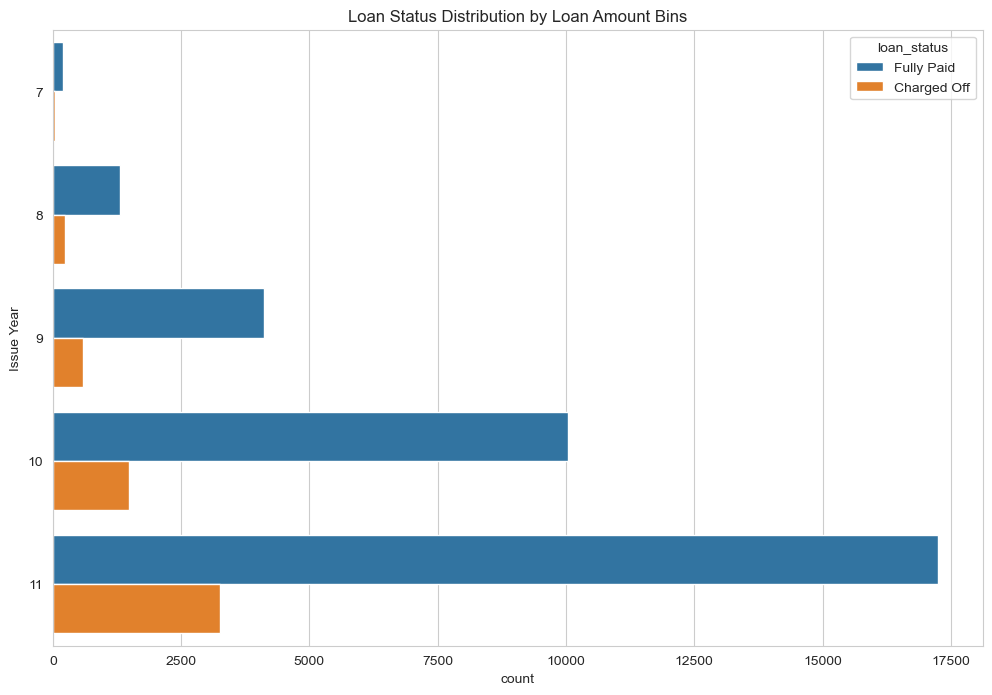

In [112]:
plt.figure(figsize=(12,8))
sns.countplot(y='issue_y',hue='loan_status',data=dfloan)
plt.ylabel("Issue Year")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

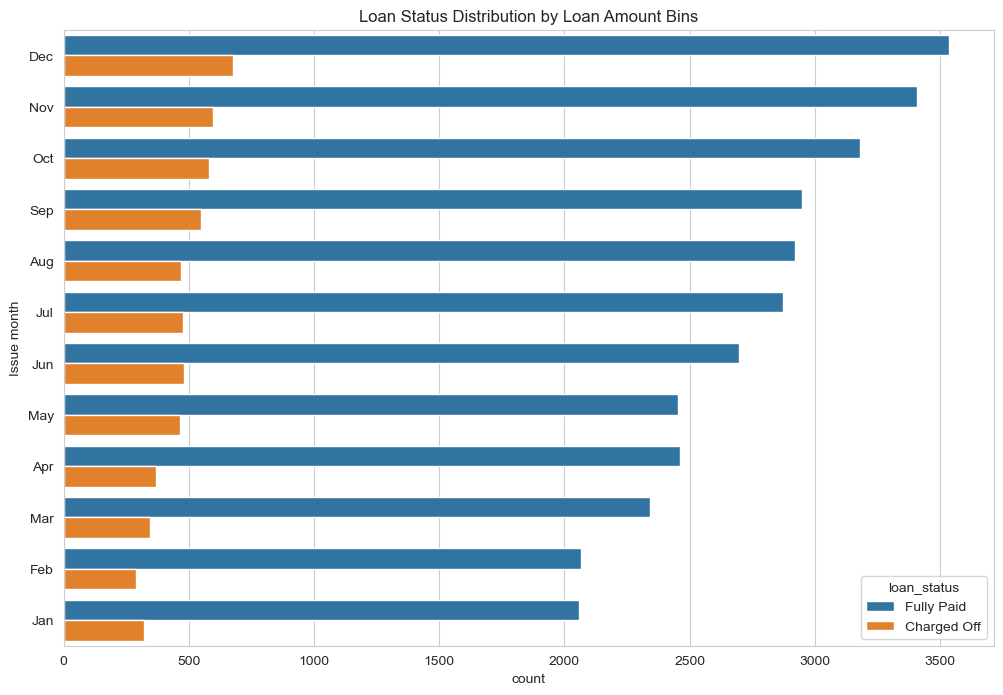

In [113]:
plt.figure(figsize=(12,8))
sns.countplot(y='issue_m',hue='loan_status',data=dfloan)
plt.ylabel("Issue month")
plt.title('Loan Status Distribution by Loan Amount Bins')
plt.show()

In [31]:
issue_mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mon in issue_mon:
    newdf = dfloan[dfloan['issue_m'] == mon]
    per = newdf['loan_status'].value_counts(normalize=True)
    print(f"Issue month: {mon}")
    print(per)
    print("\n")

Issue month: Jan
Fully Paid     0.865069
Charged Off    0.134931
Name: loan_status, dtype: float64


Issue month: Feb
Fully Paid     0.877014
Charged Off    0.122986
Name: loan_status, dtype: float64


Issue month: Mar
Fully Paid     0.871052
Charged Off    0.128948
Name: loan_status, dtype: float64


Issue month: Apr
Fully Paid     0.869304
Charged Off    0.130696
Name: loan_status, dtype: float64


Issue month: May
Fully Paid     0.840356
Charged Off    0.159644
Name: loan_status, dtype: float64


Issue month: Jun
Fully Paid     0.848113
Charged Off    0.151887
Name: loan_status, dtype: float64


Issue month: Jul
Fully Paid     0.857058
Charged Off    0.142942
Name: loan_status, dtype: float64


Issue month: Aug
Fully Paid     0.861865
Charged Off    0.138135
Name: loan_status, dtype: float64


Issue month: Sep
Fully Paid     0.843625
Charged Off    0.156375
Name: loan_status, dtype: float64


Issue month: Oct
Fully Paid     0.845786
Charged Off    0.154214
Name: loan_status, dtype: 

We can see Dec has the highes number of loan applications and also highest charge off percentage. May,Sep,Jun are other months where max number of defaults are seen. Maybe holiday season is the reason people apply for loans and then fail to pay back.

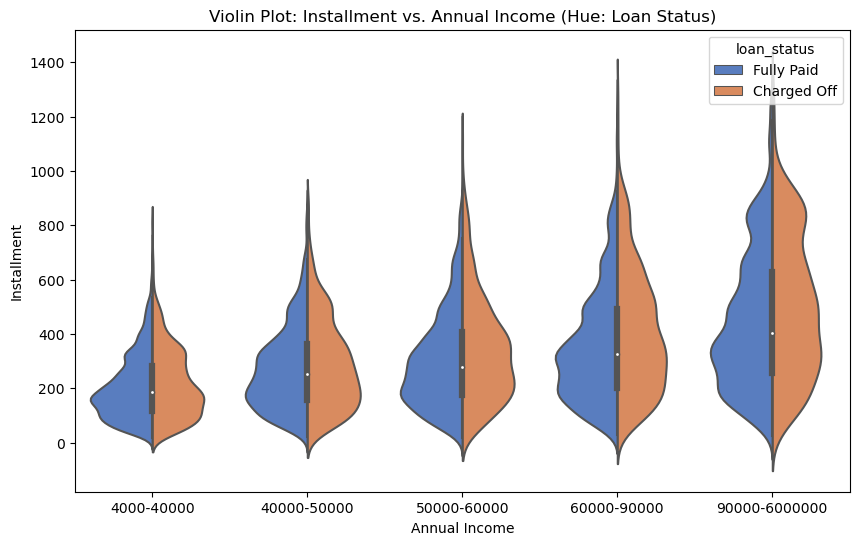

In [32]:
bins=[4000,40000,50000,60000,90000,6000000]
dfloan['column_bin']=pd.cut(dfloan['annual_inc'],bins=bins,labels=['4000-40000','40000-50000','50000-60000','60000-90000','90000-6000000'])
plt.figure(figsize=(10, 6))
sns.violinplot(data=dfloan, x='column_bin', y='installment', hue='loan_status', split=True, palette='muted')
plt.xlabel('Annual Income')
plt.ylabel('Installment')
plt.title('Violin Plot: Installment vs. Annual Income (Hue: Loan Status)')
plt.show()

Higher installments lead to higher default rates

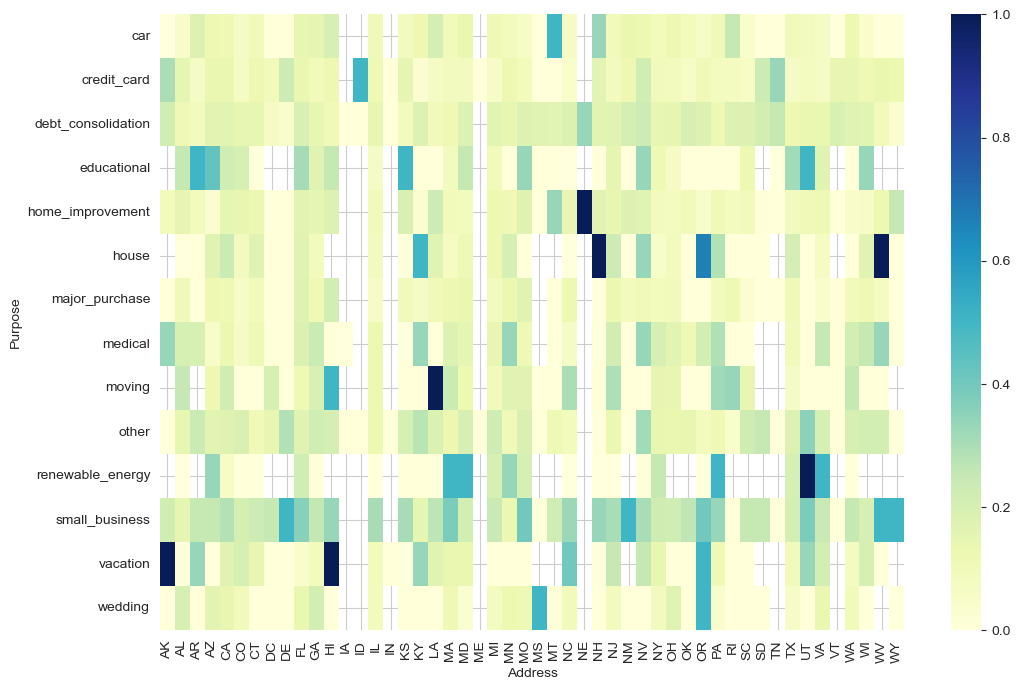

In [107]:
fig, ax = plt.subplots(figsize=(12,8))
pt = pd.pivot_table(data=dfloan, values='loan_st_ind', index='purpose', columns='addr_state')
sns.heatmap(pt, ax=ax, cmap='YlGnBu')
ax.set_xlabel('Address')
ax.set_ylabel('Purpose')
plt.show()

Below are the most risky loan lending for states with purposes are listed below:<br>
<br>
vacation loans in AK, HI<br>

education loans in AR, KS, UT, AZ<br>

small business loans in DE, NM, WV, WY, MO<br>

wedding loans in MS, OR<br>

moving loans in LA, HI<br>

renewable energy loans in UT, VA, PA, MD, MA<br>

house loans in NH, OR, WV<br>

home improvement in NE 


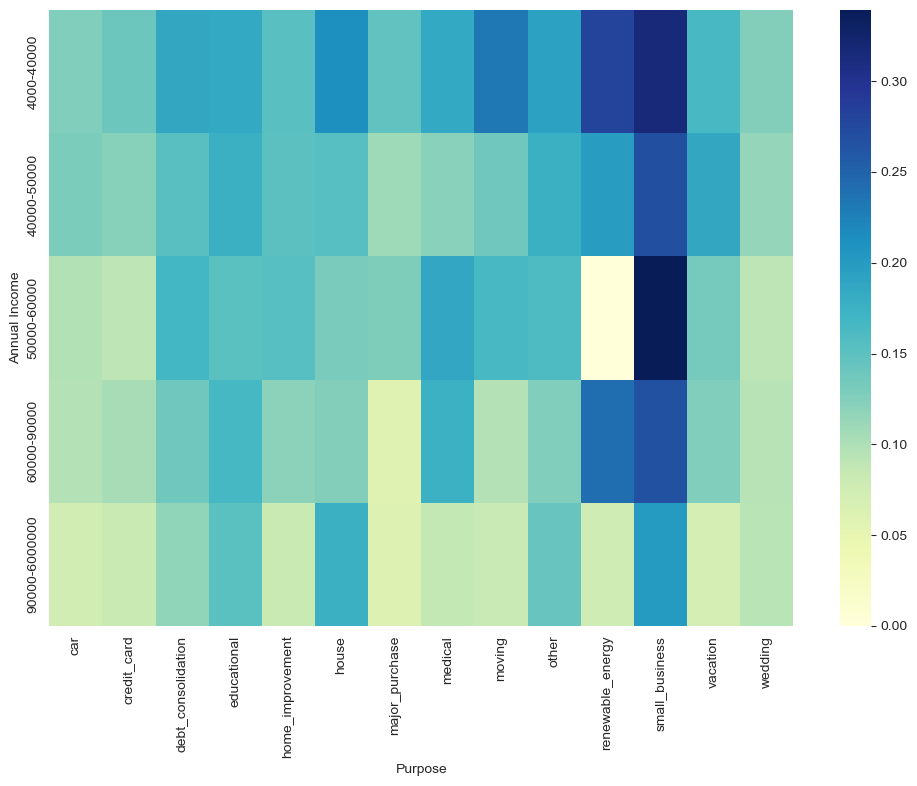

In [108]:
bins=[4000,40000,50000,60000,90000,6000000]
dfloan['column_bin']=pd.cut(dfloan['annual_inc'],bins=bins,labels=['4000-40000','40000-50000','50000-60000','60000-90000','90000-6000000'])

fig, ax = plt.subplots(figsize=(12,8))
pt = pd.pivot_table(data=dfloan, values='loan_st_ind', index='column_bin', columns='purpose')
sns.heatmap(pt, ax=ax, cmap='YlGnBu')
ax.set_xlabel('Purpose')
ax.set_ylabel('Annual Income')
plt.show()

Small business loans for lowest and middle level annual income<br>
Renewable energy for lowest and high level annual income are risker loans

# Findings-

### The below factors should be considered while lending money.

.Higher loan amount (above 16K)

•Higher installment amount (above 327)

•Lower annual income (below 37K)

•Higher debt to income ratio (above 15%)

•Applicant’s address state (NV, SD, AK, FL, etc.)

•Loan issue month (Dec, May, Sep, Jun)

•Higher interest rate (above 13%)

•Higher revolving line utilization rate (above 58%)

•Repayment term (5 years)

•Loan grade & sub-grade (D to G)

•Missing employment record

•Loan purpose (small business, renewable energy, educational)

•Derogatory public records (1 or 2)

•High loan amount & interest rate for lower income group

•High installment and longer repayment term

•Residential state and loan purpose

•Income group and loan purpose